In [844]:
# add matplotlib inline magic command
%matplotlib inline
pd.set_option("display.max_columns", None)

# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from collections import Counter
from config import db_password

In [845]:
# # create dataframe from file
# file_path = '../Resources/austinHousingData.csv'
# a_sales_df = pd.read_csv(file_path)

# a_sales_df.head()

In [846]:
# import from database
connection = psycopg2.connect(user="postgres", password=db_password, host="localhost", port="5432", database="AustinHomes")
query = "SELECT * FROM house_info INNER JOIN house_location ON house_info.zpid = house_location.zpid INNER JOIN house_school ON house_location.zpid = house_school.zpid"
a_sales_df = pd.read_sql(query, connection)
a_sales_df.head()

,zpid,description,propertytaxrate,hasassociation,hascooling,hasgarage,hasheating,hasspa,hasview,hometype,yearbuilt,latestprice,latest_saleyear,lotsizesqft,livingareasqft,numofbathrooms,numofbedrooms,numofstories,zpid,city,streetaddress,zipcode,latitude,longitude,zpid,numofprimaryschools,numofelementaryschools,numofmiddleschools,numofhighschools,avgschooldistance,avgschoolrating,avgschoolsize,medianstudentsperteacher
0,111373431,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",1.98,True,True,True,True,False,False,Single Family,2012,305000.0,2019,6011.0,2601.0,3.0,4.0,2.0,111373431,pflugerville,14424 Lake Victor Dr,78660,30.430632,-97.663078,111373431,1,0,1,1,1.266667,2.666667,1063,14
1,120900430,Absolutely GORGEOUS 4 Bedroom home with 2 full...,1.98,True,True,True,True,False,False,Single Family,2013,295000.0,2020,6185.0,1768.0,2.0,4.0,1.0,120900430,pflugerville,1104 Strickling Dr,78660,30.432673,-97.661697,120900430,1,0,1,1,1.400000,2.666667,1063,14
2,2084491383,Under construction - estimated completion in A...,1.98,True,True,False,True,False,False,Single Family,2018,256125.0,2019,7840.0,1478.0,2.0,3.0,1.0,2084491383,pflugerville,1408 Fort Dessau Rd,78660,30.409748,-97.639771,2084491383,0,2,1,1,1.200000,3.000000,1108,14
3,120901374,Absolutely darling one story home in charming ...,1.98,True,True,True,True,False,False,Single Family,2013,240000.0,2018,6098.0,1678.0,2.0,3.0,1.0,120901374,pflugerville,1025 Strickling Dr,78660,30.432112,-97.661659,120901374,1,0,1,1,1.400000,2.666667,1063,14
4,60134862,Brimming with appeal & warm livability! Sleek ...,1.98,True,True,False,True,False,False,Single Family,2002,239900.0,2018,6708.0,2132.0,3.0,3.0,2.0,60134862,pflugerville,15005 Donna Jane Loop,78660,30.437368,-97.656860,60134862,1,0,1,1,1.133333,4.000000,1223,14


In [847]:
# get list of columns and rowcount
a_sales_df.count()

zpid                        15171
description                 15171
propertytaxrate             15171
hasassociation              15171
hascooling                  15171
hasgarage                   15171
hasheating                  15171
hasspa                      15171
hasview                     15171
hometype                    15171
yearbuilt                   15171
latestprice                 15171
latest_saleyear             15171
lotsizesqft                 15171
livingareasqft              15171
numofbathrooms              15171
numofbedrooms               15171
numofstories                15171
zpid                        15171
city                        15171
streetaddress               15171
zipcode                     15171
latitude                    15171
longitude                   15171
zpid                        15171
numofprimaryschools         15171
numofelementaryschools      15171
numofmiddleschools          15171
numofhighschools            15171
avgschooldista

In [848]:
# create copy for use with the machine learning model
ml_data = a_sales_df.loc[a_sales_df['city'] == "austin"].copy()

In [849]:
# use only the columns that will be used in the model
ml_data = ml_data[['hometype', 'hasgarage', 'yearbuilt', 'latestprice', 'zipcode', 
                   'latest_saleyear', 'lotsizesqft', 'livingareasqft', 'numofbathrooms', 'numofbedrooms', 'numofstories', 'avgschooldistance']]

In [850]:
ml_data = ml_data.loc[ml_data['numofbedrooms'] != 0]
ml_data = ml_data.loc[ml_data['numofbedrooms'] < 11]
ml_data = ml_data.loc[ml_data['numofbathrooms'] < 11]
ml_data = ml_data.loc[ml_data['hometype'] != 'Other']
ml_data = ml_data.loc[ml_data['hometype'] != 'Vacant Land']
ml_data = ml_data.loc[ml_data['lotsizesqft'] < (ml_data['lotsizesqft'].max()*.001)]

In [851]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

In [852]:
X = ml_data.drop("latestprice", axis=1)

y = ml_data['latestprice']

In [853]:
X['hometype'].unique()

array(['Single Family', 'Residential', 'Mobile / Manufactured',
       'Townhouse', 'Condo', 'Multiple Occupancy', 'Apartment',
       'MultiFamily'], dtype=object)

In [854]:
ml_data.count()

hometype             14892
hasgarage            14892
yearbuilt            14892
latestprice          14892
zipcode              14892
latest_saleyear      14892
lotsizesqft          14892
livingareasqft       14892
numofbathrooms       14892
numofbedrooms        14892
numofstories         14892
avgschooldistance    14892
dtype: int64

In [855]:
home_type = {
    'Single Family': 0, 
    'Residential': 1,
    'Mobile / Manufactured': 2,
    'Townhouse': 3,
    'Condo': 4,
    'Vacant Land': 5,
    'Multiple Occupancy': 6,
    'Other': 8,
    'Apartment': 9,
    'MultiFamily': 10
}

X['hometype'] = X['hometype'].apply(lambda x: home_type[x])

In [856]:
le = LabelEncoder()

In [857]:
hasgarage = {
    'False': 0, 
    'True': 1
}

X['hasgarage'] = X['hasgarage'].apply(lambda x: hasgarage[x])

In [858]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [859]:
clf = GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=.1, loss='ls')

In [860]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [861]:
clf.score(X_test, y_test)

0.7210933525939193

In [862]:
a_sales_df.head()

,zpid,description,propertytaxrate,hasassociation,hascooling,hasgarage,hasheating,hasspa,hasview,hometype,yearbuilt,latestprice,latest_saleyear,lotsizesqft,livingareasqft,numofbathrooms,numofbedrooms,numofstories,zpid,city,streetaddress,zipcode,latitude,longitude,zpid,numofprimaryschools,numofelementaryschools,numofmiddleschools,numofhighschools,avgschooldistance,avgschoolrating,avgschoolsize,medianstudentsperteacher
0,111373431,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",1.98,True,True,True,True,False,False,Single Family,2012,305000.0,2019,6011.0,2601.0,3.0,4.0,2.0,111373431,pflugerville,14424 Lake Victor Dr,78660,30.430632,-97.663078,111373431,1,0,1,1,1.266667,2.666667,1063,14
1,120900430,Absolutely GORGEOUS 4 Bedroom home with 2 full...,1.98,True,True,True,True,False,False,Single Family,2013,295000.0,2020,6185.0,1768.0,2.0,4.0,1.0,120900430,pflugerville,1104 Strickling Dr,78660,30.432673,-97.661697,120900430,1,0,1,1,1.400000,2.666667,1063,14
2,2084491383,Under construction - estimated completion in A...,1.98,True,True,False,True,False,False,Single Family,2018,256125.0,2019,7840.0,1478.0,2.0,3.0,1.0,2084491383,pflugerville,1408 Fort Dessau Rd,78660,30.409748,-97.639771,2084491383,0,2,1,1,1.200000,3.000000,1108,14
3,120901374,Absolutely darling one story home in charming ...,1.98,True,True,True,True,False,False,Single Family,2013,240000.0,2018,6098.0,1678.0,2.0,3.0,1.0,120901374,pflugerville,1025 Strickling Dr,78660,30.432112,-97.661659,120901374,1,0,1,1,1.400000,2.666667,1063,14
4,60134862,Brimming with appeal & warm livability! Sleek ...,1.98,True,True,False,True,False,False,Single Family,2002,239900.0,2018,6708.0,2132.0,3.0,3.0,2.0,60134862,pflugerville,15005 Donna Jane Loop,78660,30.437368,-97.656860,60134862,1,0,1,1,1.133333,4.000000,1223,14


In [865]:
X.head()

,hometype,hasgarage,yearbuilt,zipcode,latest_saleyear,lotsizesqft,livingareasqft,numofbathrooms,numofbedrooms,numofstories,avgschooldistance
14,0,1,1980,78724,2019,5575.0,939.0,1.0,2.0,1.0,3.233333
18,0,0,2014,78717,2018,10672.0,4564.0,6.0,5.0,2.0,3.266667
19,0,1,2007,78717,2018,9060.0,3233.0,4.0,5.0,2.0,1.933333
20,0,1,2006,78724,2020,7448.0,1511.0,2.0,3.0,1.0,2.433333
21,0,0,2008,78717,2020,7666.0,2228.0,2.0,3.0,1.0,1.900000


In [796]:
a_sales_df['hasassociation'].unique()

array(['True', 'False'], dtype=object)

In [797]:
mean_price_by_year = ml_data.groupby(['latest_saleyear']).mean()['latestprice']
mean_price_by_year

latest_saleyear
2018    484474.605878
2019    497312.701256
2020    548251.522860
2021    641725.000000
Name: latestprice, dtype: float64

Text(0.5, 1.0, 'Housing price by year')

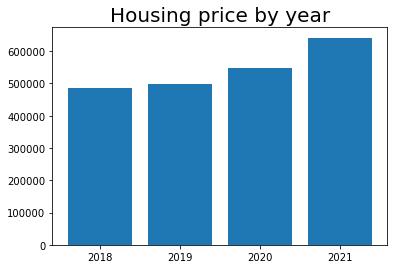

In [798]:
plt.bar(['2018', '2019', '2020', '2021'], mean_price_by_year)
plt.title('Housing price by year', fontsize=20)

Text(0.5, 1.0, 'Housing price by lot size')

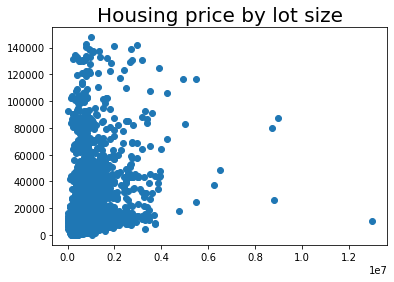

In [799]:
scatter_zoom = ml_data.loc[ml_data['lotsizesqft'] < ml_data['lotsizesqft'].max()*.1]
plt.scatter(scatter_zoom['latestprice'], scatter_zoom['lotsizesqft'])
plt.title('Housing price by lot size', fontsize=20)

Text(0.5, 1.0, 'Housing price by living area size')

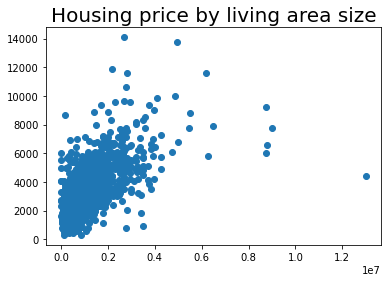

In [629]:
scatter_zoom = ml_data.loc[ml_data['livingAreaSqFt'] < ml_data['livingAreaSqFt'].max()*.2]

plt.scatter(scatter_zoom['latestPrice'], scatter_zoom['livingAreaSqFt'])
plt.title('Housing price by living area size', fontsize=20)

Text(0.5, 1.0, 'Mean Housing price by bathrooms')

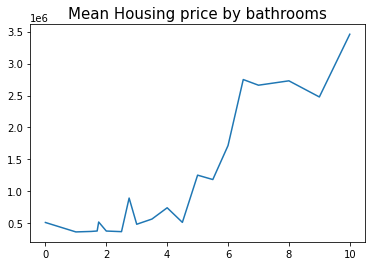

In [632]:
mean_price_by_bathrooms = ml_data.groupby(['numOfBathrooms']).mean()['latestPrice']

plt.plot([ 0.0, 1.0, 1.5, 1.7, 1.75, 2.0, 2.5, 2.75, 3.0, 3.5, 4.0, 
          4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 8.0, 9.0, 10.0], mean_price_by_bathrooms)
plt.title('Mean Housing price by bathrooms', fontsize=15)

Text(0.5, 1.0, 'Mean Housing price by School Distance')

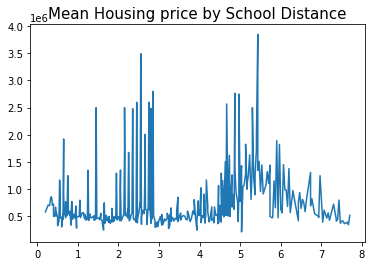

In [670]:
import numpy as np

mean_price_by_school_distance = ml_data.sort_values(['avgSchoolDistance'], ascending=True).groupby(['avgSchoolDistance']).mean()['latestPrice']
school_distance = np.sort(ml_data['avgSchoolDistance'].unique())
school_distance

plt.plot(school_distance, mean_price_by_school_distance)
plt.title('Mean Housing price by School Distance', fontsize=15)

In [767]:
ml_data['avgSchoolDistance'].max()

7.699999999999998

In [802]:
X_train.columns

Index(['hometype', 'hasgarage', 'yearbuilt', 'zipcode', 'latest_saleyear',
       'lotsizesqft', 'livingareasqft', 'numofbathrooms', 'numofbedrooms',
       'numofstories', 'avgschooldistance'],
      dtype='object')

In [878]:
X['yearbuilt'].unique().max()

2020

In [879]:
X['yearbuilt'].unique().min()

1905

In [882]:
np.sort(X['zipcode'].unique())

array([78652, 78653, 78701, 78702, 78703, 78704, 78705, 78717, 78719,
       78721, 78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729,
       78730, 78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738,
       78739, 78741, 78742, 78744, 78745, 78746, 78747, 78748, 78749,
       78750, 78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759],
      dtype=int64)

In [884]:
X['numofbathrooms'].unique()

array([ 1.  ,  6.  ,  4.  ,  2.  ,  5.  ,  3.  ,  7.  ,  8.  , 10.  ,
        2.5 ,  6.5 ,  0.  ,  3.5 ,  4.5 ,  5.5 ,  2.75,  1.5 ,  1.75,
        9.  ,  1.7 ])

In [885]:
X['numofbedrooms'].unique()

array([ 2.,  5.,  3.,  4.,  8.,  7.,  6.,  1., 10.])

In [887]:
X['numofstories'].unique()

array([1., 2., 3., 4.])

In [891]:
X['avgschooldistance'].max()

7.699999999999998